In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<center><h1>Data Cleaning and Preprocessing</h1></center>

In [4]:
df = df[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<center>
  <h3>Handling Missing Values</h3>
</center>

In [5]:
# Ensure modifications are done on the original DataFrame using .loc
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])
df.loc[:, 'date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df.loc[:, 'rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.loc[:, 'director'] = df['director'].fillna('')
df.loc[:, 'cast'] = df['cast'].fillna('')
df.loc[:, 'duration'] = df['duration'].fillna('')
df.loc[:, 'listed_in'] = df['listed_in'].fillna('')
df.loc[:, 'description'] = df['description'].fillna('')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
def separate_duration(duration):
    if 'min' in duration:
        return int(duration.split()[0]), None
    elif 'Season' in duration:
        return None, int(duration.split()[0])
    else:
        return None, None

# Apply the separate_duration function and create new columns
df['duration_minutes'], df['duration_seasons'] = zip(*df['duration'].apply(separate_duration))

# Drop rows where both duration_minutes and duration_seasons are None
df = df.dropna(subset=['duration_minutes', 'duration_seasons'], how='all')

# Fill NaN with 0 for easier processing using .loc
df.loc[:, 'duration_minutes'] = df['duration_minutes'].fillna(0)
df.loc[:, 'duration_seasons'] = df['duration_seasons'].fillna(0)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,,,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0


<center>
  <h3>Drop Columns with Missing Values</h3>
</center>

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0,2021.0
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,,,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0,2021.0
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0,2021.0


<center>
    <h1>    
Exploratory Data Analysis (EDA)
    </h1>
</center>

<center>
    <h3>    
Distribution of content types
    </h3>
</center>

<Axes: title={'center': 'Distribution of Content Types'}, xlabel='type'>

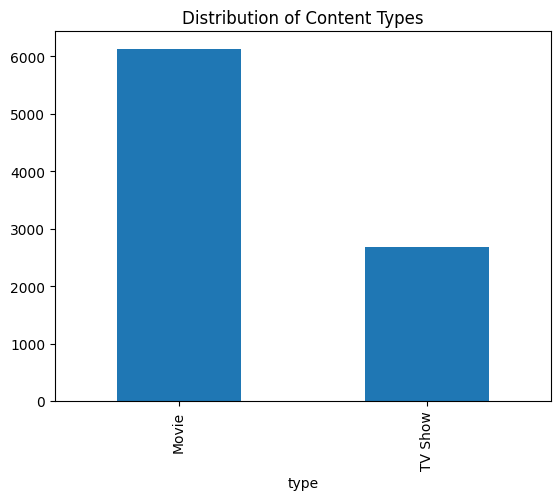

In [8]:
df['type'].value_counts().plot(kind='bar', title='Distribution of Content Types')

<center>
    <h3>    
Trend of content
    </h3>
</center>

<Axes: title={'center': 'Content Added Over the Years'}, xlabel='year_added'>

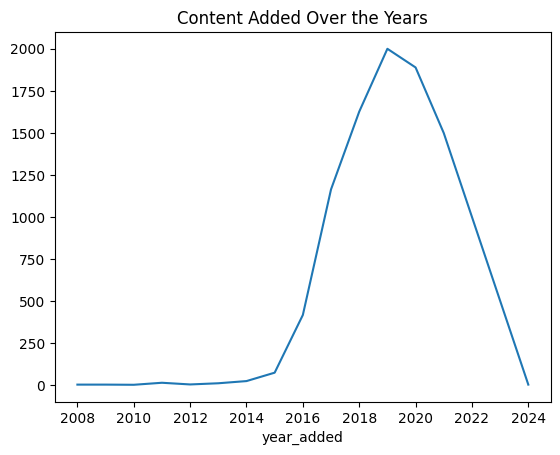

In [9]:
# plot trend of content added over the years
df['year_added'].value_counts().sort_index().plot(kind='line', title='Content Added Over the Years')

<center>
    <h3>
Top countries producing content
    </h3>
</center>

<Axes: title={'center': 'Top 10 Countries Producing Content'}, xlabel='country'>

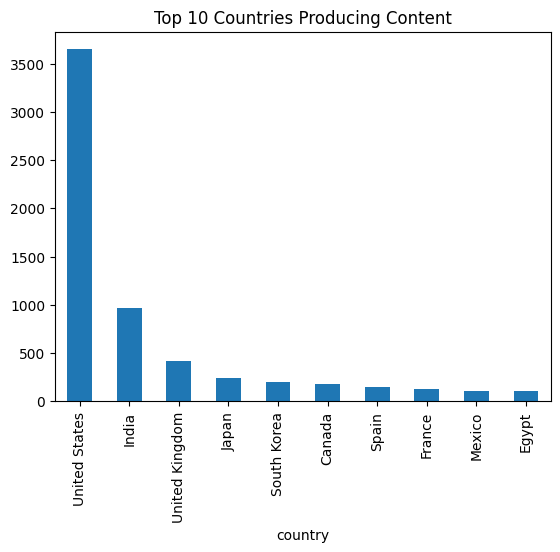

In [10]:
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries Producing Content')

<center>
    <h3>    
Distribution of ratings:
    </h3>
</center>

<Axes: title={'center': 'Distribution of Ratings'}, xlabel='rating'>

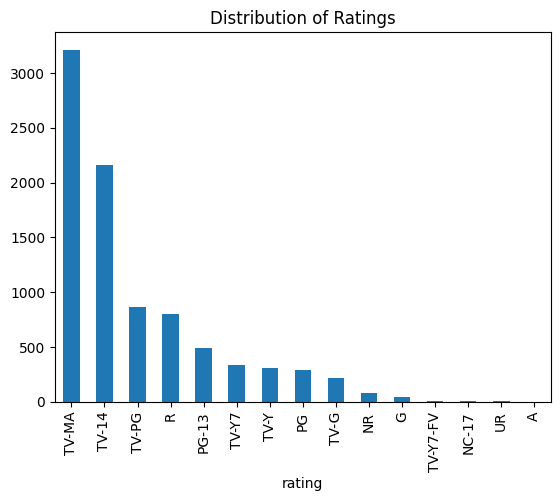

In [11]:
df['rating'].value_counts().plot(kind='bar', title='Distribution of Ratings')

<center>
    <h2>
Popular Genres
    </h2>
</center>

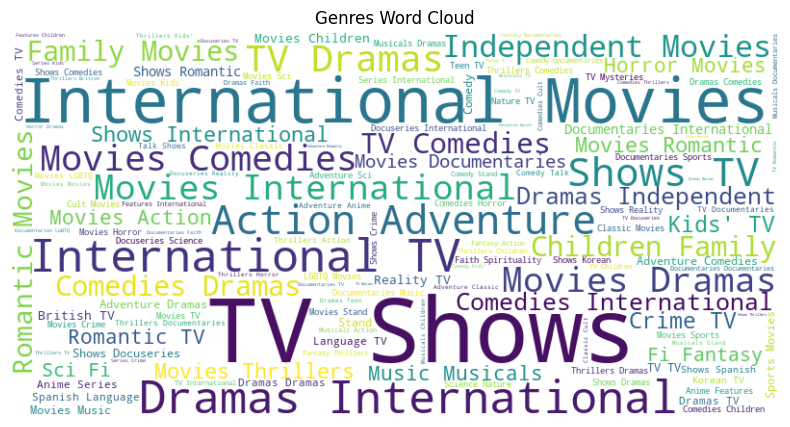

In [12]:
from wordcloud import WordCloud

genres = ' '.join(df['listed_in'].dropna().str.replace(',', ' ').tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Word Cloud')
plt.show()

<center>
    <h2>
    Top 10 actors/actress
    </h2>
</center>

Text(0.5, 1.0, 'Top 10 Actors/Actresses')

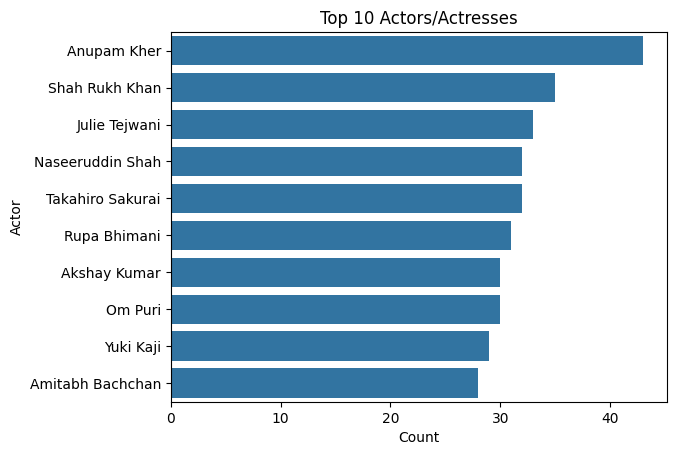

In [13]:
from typing import Counter


na_df = df[df['cast'] != '']
cast = na_df['cast'].dropna().str.split(', ')
cast_counts = Counter([actor for sublist in cast for actor in sublist])
cast_df = pd.DataFrame(cast_counts.most_common(10), columns=['Actor', 'Count'])
sns.barplot(x='Count', y='Actor', data=cast_df).set_title('Top 10 Actors/Actresses')

<center>
    <h3>
Top 5 Directors with most content
    </h3>
</center>

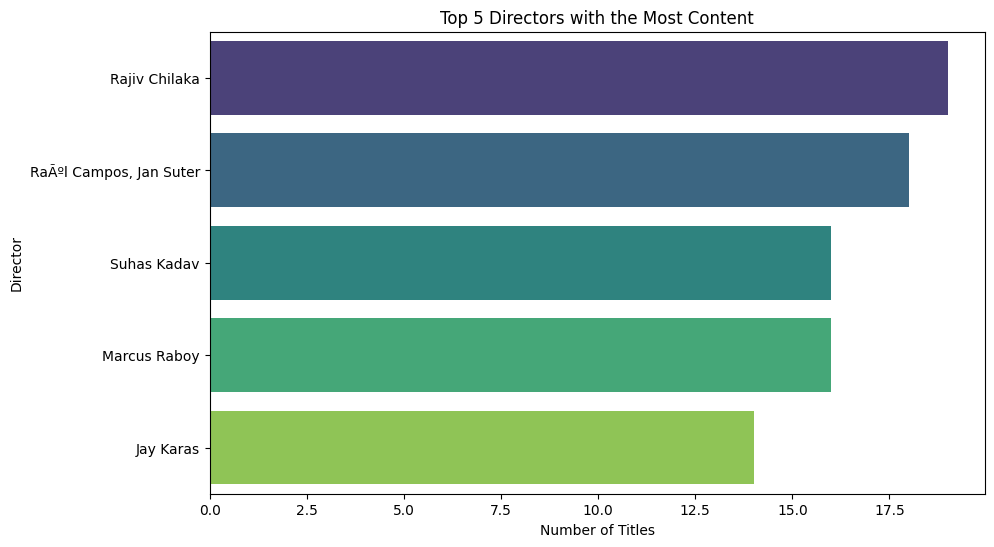

In [14]:
top_directors = df[df['director'] != '']['director'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 5 Directors with the Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

<center>
    <h3>
Duration of Movies vs. TV Shows
    </h3>
</center>

Text(0.5, 1.0, 'Duration of Movies vs TV Shows')

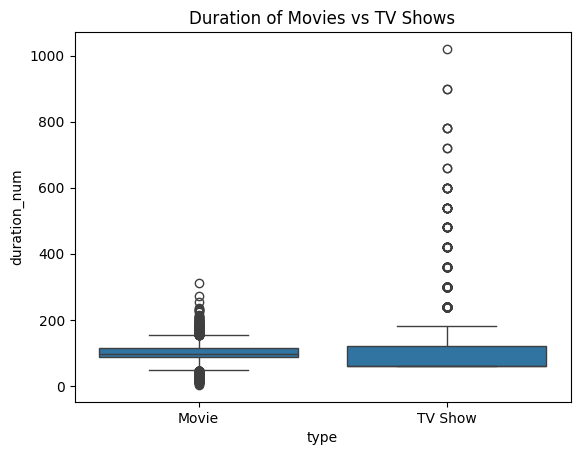

In [15]:
df['duration_num'] = df['duration_minutes'] + df['duration_seasons'] * 60
sns.boxplot(x='type', y='duration_num', data=df).set_title('Duration of Movies vs TV Shows')

<center>
    <h3>
Distribution of duration of Movies vs. TV Shows
    </h3>
</center>

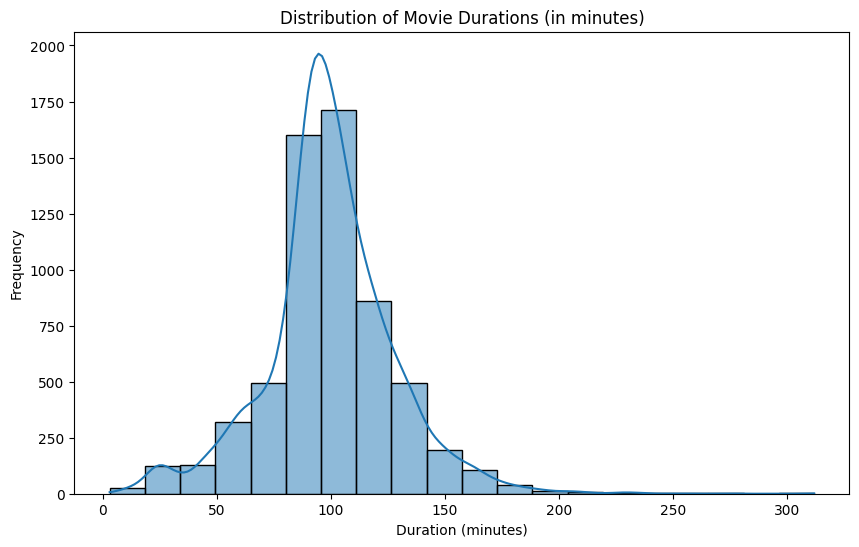

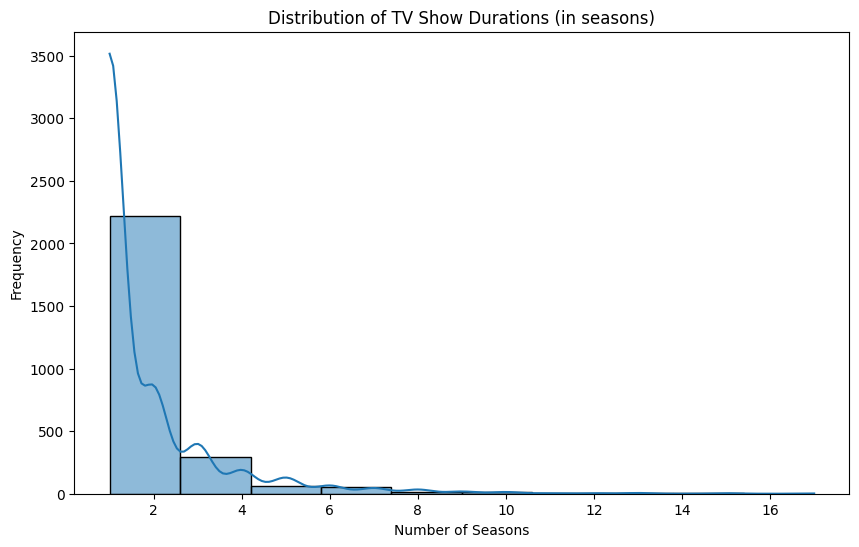

In [16]:
# Visualization of Movie Durations (in Minutes)
movies_df = df[df['type'] == 'Movie']
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_minutes'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualization of TV Show Durations (in Seasons)
tv_shows_df = df[df['type'] == 'TV Show']
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows_df['duration_seasons'].dropna(), bins=10, kde=True)
plt.title('Distribution of TV Show Durations (in seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


<center>
    <h2>
Corelation Matrix
    </h2>
</center>

Text(0.5, 1.0, 'Correlation Matrix')

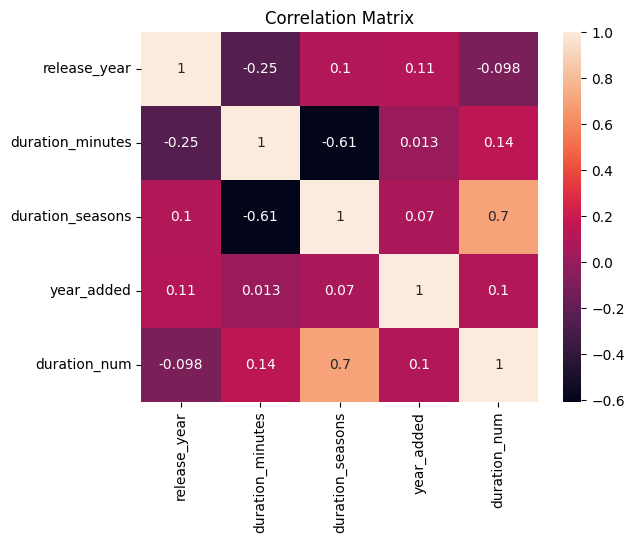

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True).set_title('Correlation Matrix')

<center>
    <h1>
Data Visualization
    </h1>
</center>

In [18]:
import plotly.express as px

fig = px.histogram(df, x='rating', title='Distribution of Ratings')
fig.show()


In [19]:
fig = px.scatter(df, x='release_year', y='duration_num', color='rating', title='Release Year vs Duration')
fig.show()


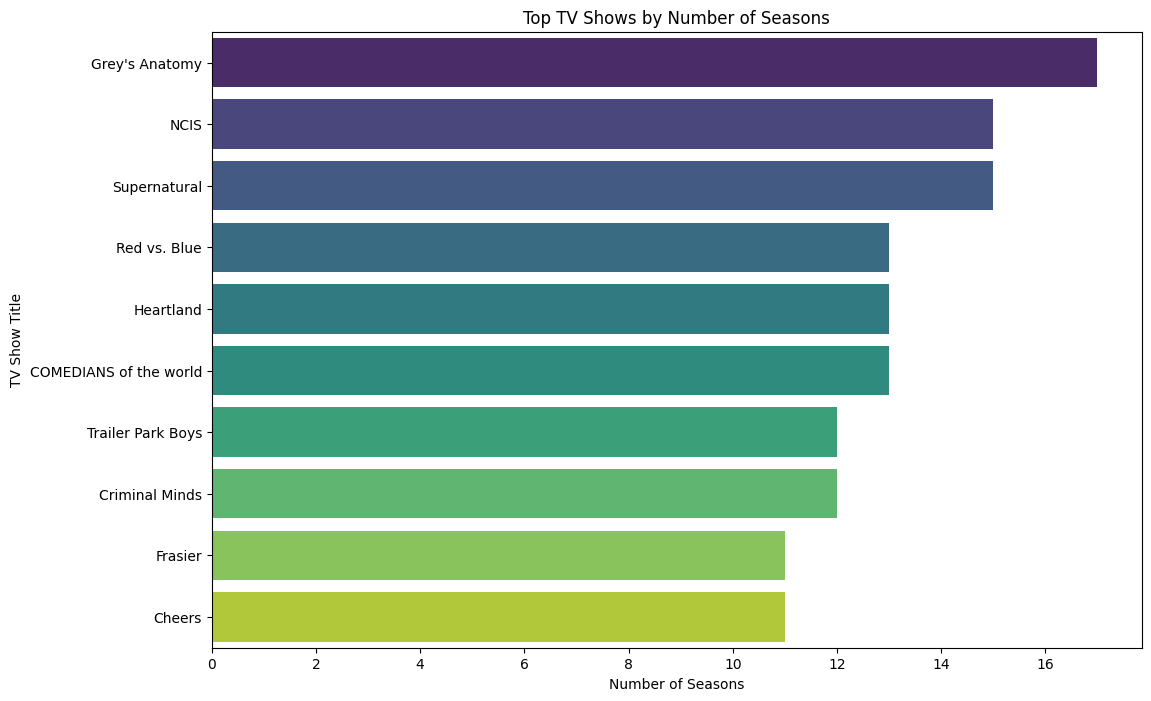

In [20]:
tv_shows_df = df[df['type'] == 'TV Show']

# Drop rows where duration_seasons is None
tv_shows_df = tv_shows_df.dropna(subset=['duration_seasons'])

# Convert duration_seasons to integer
tv_shows_df['duration_seasons'] = tv_shows_df['duration_seasons'].astype(int)

# Sort the DataFrame by duration_seasons in descending order
top_tv_shows = tv_shows_df.sort_values(by='duration_seasons', ascending=False)

# Select the top N titles
top_n = 10
top_tv_shows = top_tv_shows.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='duration_seasons', y='title', data=top_tv_shows, palette='viridis')
plt.title('Top TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')
plt.show()

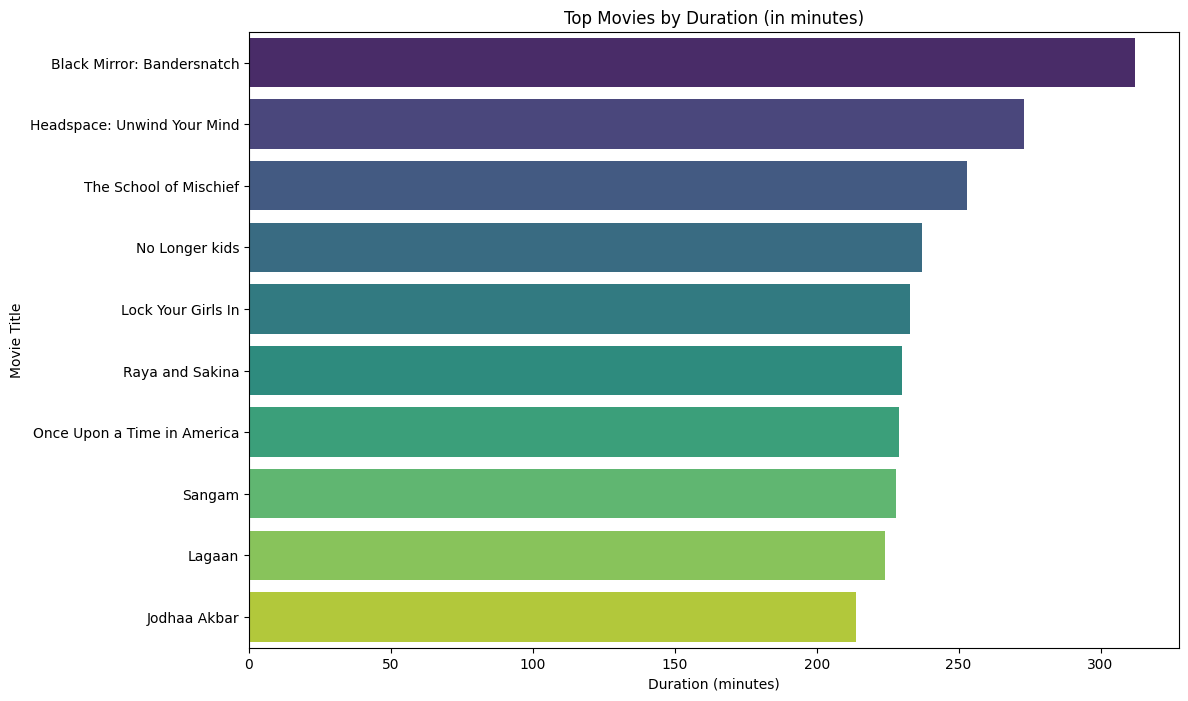

In [21]:
movies_df = df[df['type'] == 'Movie']

# Drop rows where duration_minutes is None
movies_df = movies_df.dropna(subset=['duration_minutes'])

# Convert duration_minutes to integer
movies_df['duration_minutes'] = movies_df['duration_minutes'].astype(int)

# Sort the DataFrame by duration_minutes in descending order
top_movies = movies_df.sort_values(by='duration_minutes', ascending=False)

# Select the top N titles
top_n = 10
top_movies = top_movies.head(top_n)

# Plot the top movies by duration in minutes
plt.figure(figsize=(12, 8))
sns.barplot(x='duration_minutes', y='title', data=top_movies, palette='viridis')
plt.title('Top Movies by Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Movie Title')
plt.show()

<center>
    <h1>
Actor and Director with most movies with each other
    </h1>
</center>

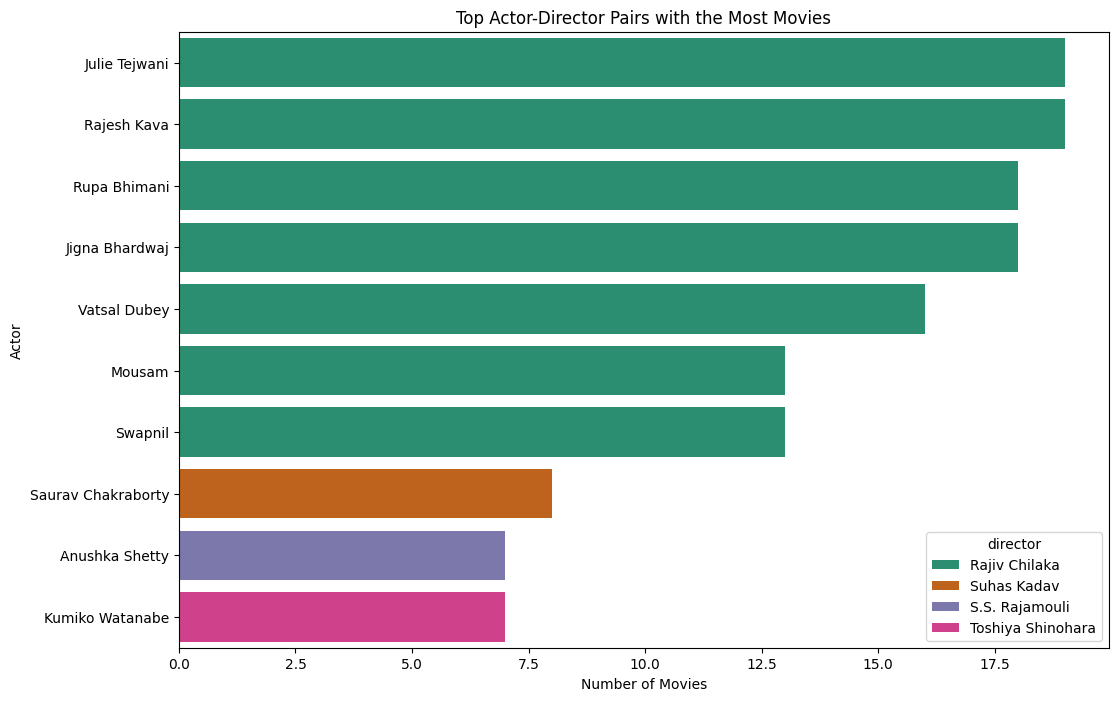

In [22]:
actor_director_df = df[(df['cast'] != '') & (df['director'] != '')]
actor_director_df = actor_director_df[['cast', 'director']]
actor_director_df = actor_director_df.dropna()

actor_director_df['cast'] = actor_director_df['cast'].str.split(', ')
actor_director_df['director'] = actor_director_df['director'].str.split(', ')

actor_director_df = actor_director_df.explode('cast')
actor_director_df = actor_director_df.explode('director')

actor_director_counts = actor_director_df.groupby(['cast', 'director']).size().reset_index(name='count')
actor_director_counts = actor_director_counts.sort_values(by='count', ascending=False)

top_actor_director = actor_director_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='cast', hue='director', data=top_actor_director, palette='Dark2')
plt.title('Top Actor-Director Pairs with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

<center>
    <h1>
Hypothesis Testing
    </h1>
</center>

<center>
    <h2>
TV Shows vs Movies Rating
    </h2>
</center>

In [23]:

from scipy.stats import ttest_ind

# H0: There is no difference between the average rating of movies and TV shows on Netflix.
# H1: The average rating of movies is different from the average rating of TV shows on Netflix.

# Filter the DataFrame to include only movies and TV shows

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

movies['rating'] = pd.to_numeric(movies['rating'], errors='coerce')
tv_shows['rating'] = pd.to_numeric(tv_shows['rating'], errors='coerce')

# Calculate the p-value
t_stat, p_value = ttest_ind(movies['rating'], tv_shows['rating'])

# Interpret the results
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in average rating between movies and TV shows.")
else:
    print("Fail to reject null hypothesis. Not enough evidence to conclude a difference in average rating.")

Fail to reject null hypothesis. Not enough evidence to conclude a difference in average rating.


In [24]:
from scipy.stats import chi2_contingency

# H0: There is no association between the genre and country of content on Netflix.
# H1: There is an association between the genre and country of content on Netflix.

# Create a contingency table
genre_country_table = pd.crosstab(df['listed_in'], df['country'])

# Calculate the chi-square test statistic and p-value
chi2_stat, p_value, dof, expected = chi2_contingency(genre_country_table)

# Interpret the results
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis. There is an association between genre and country of content on Netflix.")
else:
    print("Fail to reject null hypothesis. Not enough evidence to conclude an association between genre and country.")

Fail to reject null hypothesis. Not enough evidence to conclude an association between genre and country.


<center>
    <h1>
Advance Analysis (Machine Learning Models)
    </h1>
</center>

<center>
    <h2>
Recommendation Algorithm
    </h2>
</center>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Replace null values with empty strings for the relevant textual features
df['cast'] = df['cast'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')
df['description'] = df['description'].fillna('')

# Combine features into a single string
df['combined_features'] = df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['title'] == title].index[0]

    # Get the pairwise similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar shows
    return df['title'].iloc[show_indices]

# Test the recommendation system
print(get_recommendations('13 Reasons Why'))


3561               13 Reasons Why: Beyond the Reasons
7479                                     Molly's Game
5457                                        Mind Game
8123                                 Super Dark Times
1828                               Unsolved Mysteries
6606               Diana: 7 Days That Shook the World
1328    Crime Scene: The Vanishing at the Cecil Hotel
5286                                        Frequency
70                          Too Hot To Handle: Latino
2225                                    Gigantosaurus
Name: title, dtype: object
